In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['text.usetex'] = True


In [28]:
def plot_image(k):
    
    # sampling rate
    fs = 300;  
    # sampling interval
    Ts = 1.0/fs; 
    # time vector
    pts = np.arange(start=0, stop=np.pi/2, step=Ts)
    num_pts = len(pts)
    
    # Sine frequency
    f = 80
    # Sinusoidal function
    s = np.sin(2*np.pi*f*pts)
    
    # Noise vector
    mu, sigma = 0, 1
    # Defing noise
    n = np.random.normal(mu, sigma, num_pts)

    # Adding noise to sine
    x = s + k*n
    
    w = np.arange(num_pts)

    T = num_pts/fs
    frq = w/T 

    # One side frequency range
    num_pts_half = int(num_pts/2)
    frq = frq[range(num_pts_half)]

    # FFT computing and normalization
    X = np.fft.fft(x)/num_pts_half
    X = X[range(num_pts_half)]
    
    argmax = np.argmax(np.absolute(X))
    estimated_freq = frq[argmax]


    fig, ax = plt.subplots(figsize=(7,5))
#     ax.plot(frq, abs(X), label=f'Ganho k = {k}, freq. estimada f = {estimated_freq:.2f} Hz')
    ax.plot(frq, abs(X))
    print(f'Ganho k = {k}, freq. estimada f = {estimated_freq:.2f} Hz')
    
    ax.grid(False)
    ax.set(xlabel=r'$f$~[Hz]', ylabel=r'$|Y(f)|$')
    plt.savefig(f'dft-{k}.eps', transparent=True, optimize=True, bbox_inches='tight')

    
   # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

    # Put a legend below current axis
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5)



    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    y_max = 1
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

Ganho k = 0.1, freq. estimada f = 80.08 Hz
Ganho k = 0.5, freq. estimada f = 80.08 Hz
Ganho k = 1, freq. estimada f = 80.08 Hz
Ganho k = 2, freq. estimada f = 80.08 Hz
Ganho k = 4, freq. estimada f = 80.08 Hz
Ganho k = 5, freq. estimada f = 88.98 Hz
Ganho k = 10, freq. estimada f = 107.42 Hz


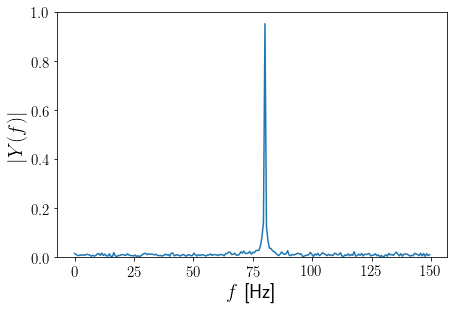

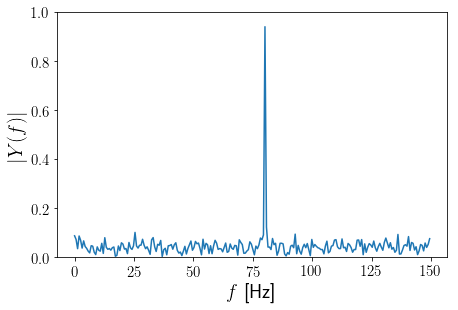

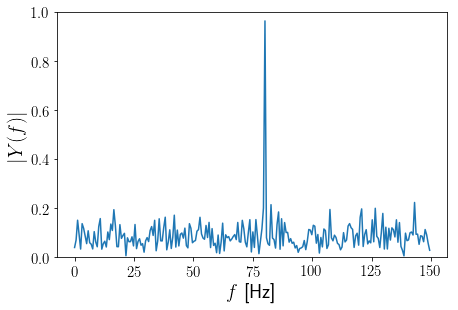

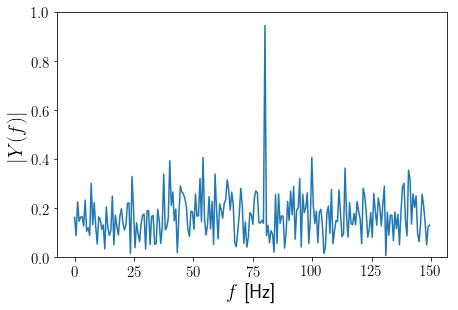

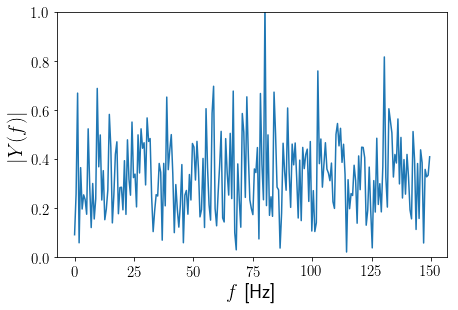

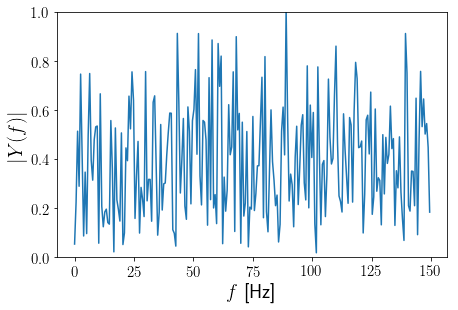

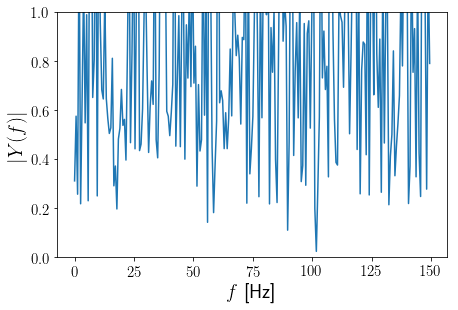

In [30]:
kwargs_write = {'fps':0.7, 'quantizer':'nq'}
imageio.mimsave('./abs.gif', [plot_image(k) for k in [0.1, 0.5, 1, 2, 4, 5, 10]], fps=0.7)